<a href="https://colab.research.google.com/github/sarahlai30/Machine-Learning-INDE-577/blob/main/Supervised%20Learning/Ensemble_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ensemble Methods**

Ensemble methods are machine learning methods that improve the accuracy of results in models by combining multiple models instead of using a single model.We will be looking at three methods, **Hard Voting**, **Bagging** (Bootstrap Aggregating), and **Random Forest**.

To demonstrate our ensemble methods, we will be using the Wine dataset in scikit learn.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

wine = load_wine()
X = wine.data
y = wine.target

## Hard Voting
Starting with the simplest approach, each classifier makes a prediction, and the ensemble’s prediction is simply the majority vote.

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=9)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define individual classifiers
log_clf = LogisticRegression(max_iter=5000, random_state=9)  # Logistic Regression
rnd_clf = RandomForestClassifier(random_state=9)  # Random Forest Classifier
svm_clf = SVC(random_state=9)  # Support Vector Classifier

# Define the Voting Classifier (Hard Voting)
voting_clf = VotingClassifier(
    estimators=[("lr", log_clf), ("rf", rnd_clf), ("svm", svm_clf)],
    voting="hard"  # Hard voting
)

# Train and evaluate individual classifiers
log_clf.fit(X_train, y_train)
log_y_pred = log_clf.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, log_y_pred):.2f}")

rnd_clf.fit(X_train, y_train)
rnd_y_pred = rnd_clf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, rnd_y_pred):.2f}")

svm_clf.fit(X_train, y_train)
svm_y_pred = svm_clf.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, svm_y_pred):.2f}")

# Train and evaluate the Voting Classifier
voting_clf.fit(X_train, y_train)
voting_y_pred = voting_clf.predict(X_test)
print(f"Voting Classifier Accuracy: {accuracy_score(y_test, voting_y_pred):.2f}")

Logistic Regression Accuracy: 0.96
Random Forest Accuracy: 0.99
SVM Accuracy: 1.00
Voting Classifier Accuracy: 0.99


The Voting Classifier achieved 99% accuracy, which is close to the best-performing individual classifier (SVM). Since hard voting uses majority voting, the ensemble performed almost as well as the best model while maintaining robustness through multiple classifiers.

## Bagging
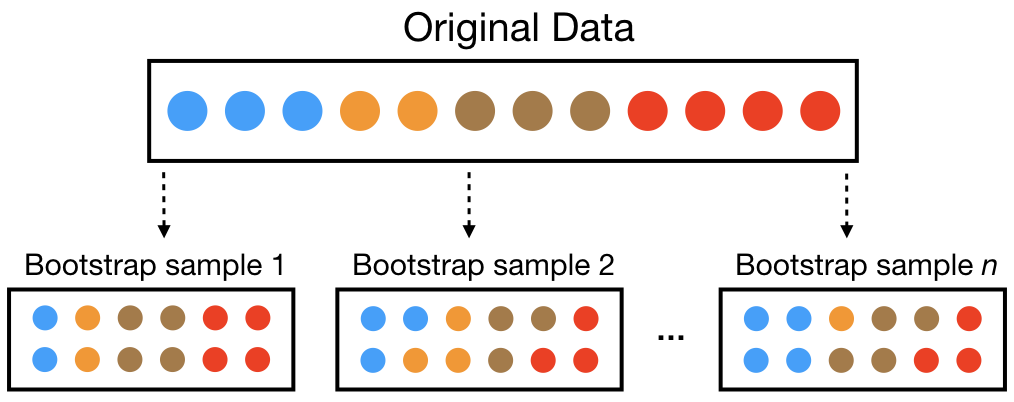
Next, we will do Bagging, or formally known as Bootstrap Aggregating.
Bagging is composed of two parts: aggregation and bootstrapping.
1. Bootstrapping (Sampling with Replacement):

This involves selecting random samples from the training dataset with replacement, meaning the same sample can be selected more than once.
Each of these samples is used to train a separate model, creating multiple models trained on different subsets of the data.

Example: If you have 100 data points, you might create 10 different models, each trained on a random sample of those points.

2. Aggregation (Combining Predictions):

After training, each model makes a prediction on new data.
The predictions are combined (aggregated) to form a final output:

*   For Classification: Use majority voting (the most common class).
*   For Regression: Use the average of the predictions.

Sampling with replacement (Boostrapping) ensures that each sample selection is independent so that random and diverse datasets for used in training.This randomness helps create models that are different from one another.


In a regression task, the variance measures how much the model's predictions differ from the true target values. A model with high variance produces predictions that deviate significantly from the actual targets, indicating that it may be overfitting the training data by capturing noise instead of meaningful patterns.

To demonstrate this concept, we will use the Wine dataset and compare the performance of two models:

*   A single Decision Tree Regressor
*   A Bagging Regressor composed of multiple Decision Stumps (depth-1 decision trees).

Since a single depth-1 decision tree (Decision Stump) is too simple to learn the complex relationships in the Wine dataset, no individual model can separate the data well.

In [ ]:
# import metrics
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

stump_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")


tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

Stump Classification Report
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        30
           1       0.55      0.92      0.69        24
           2       0.00      0.00      0.00        18

    accuracy                           0.67        72
   macro avg       0.45      0.59      0.51        72
weighted avg       0.52      0.67      0.58        72
 

Tree Classification Report
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        30
           1       0.74      0.83      0.78        24
           2       1.00      0.78      0.88        18

    accuracy                           0.85        72
   macro avg       0.87      0.84      0.85        72
weighted avg       0.86      0.85      0.85        72
 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


We can see that increasing the depth of our tree leads to a much higher accuracy than our singular decision stump. Now let's see what a Bagging Classifier can do. We create a Bagging Classifier using Decision Stumps (Decision Trees with max_depth=1) as base learners.

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Bagging Classification Report
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        30
           1       0.77      1.00      0.87        24
           2       1.00      0.83      0.91        18

    accuracy                           0.90        72
   macro avg       0.92      0.90      0.90        72
weighted avg       0.92      0.90      0.91        72
 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


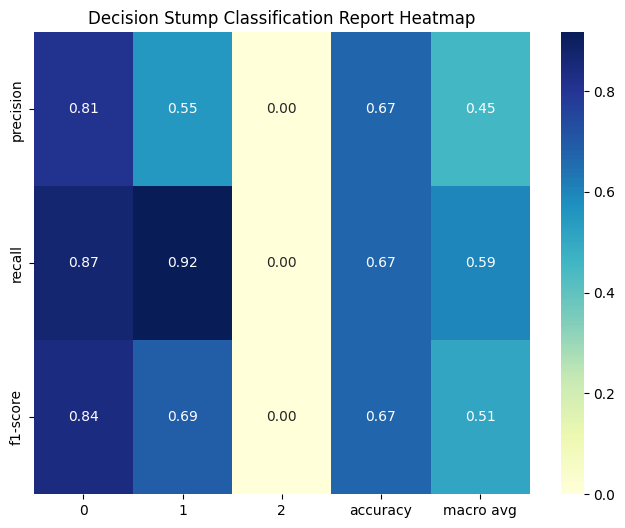

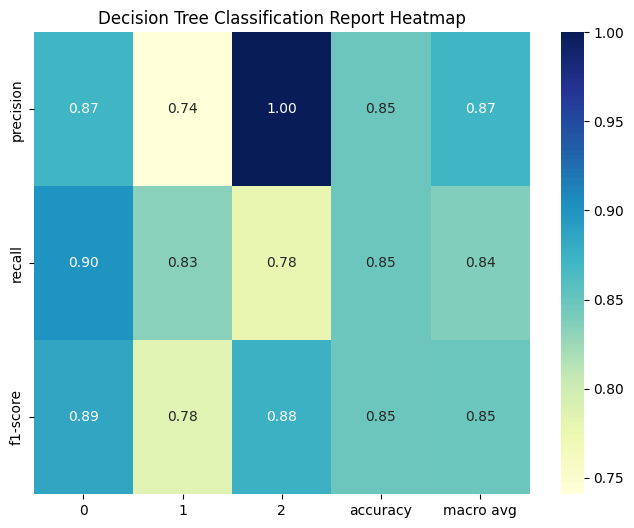

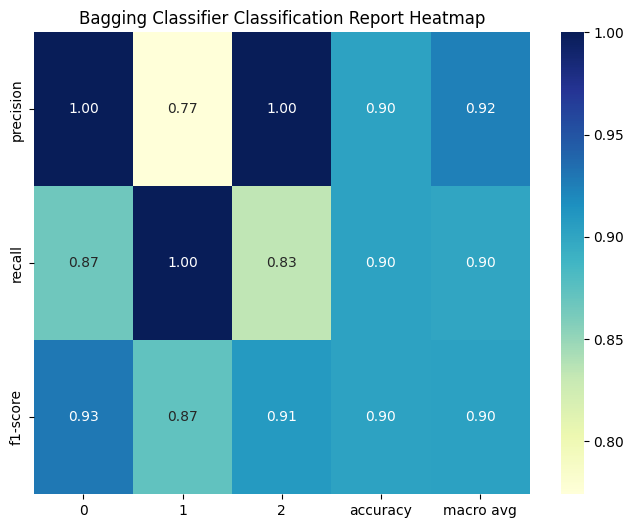

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report

# Generate classification reports
reports = {
    "Decision Stump": classification_report(y_test, stump_y_pred, output_dict=True),
    "Decision Tree": classification_report(y_test, tree_y_pred, output_dict=True),
    "Bagging Classifier": classification_report(y_test, bag_y_pred, output_dict=True)
}

# Visualize each report as a heatmap
for name, report in reports.items():
    report_df = pd.DataFrame(report).iloc[:-1, :-1]  # Remove support and avg
    plt.figure(figsize=(8, 6))
    sns.heatmap(report_df, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title(f"{name} Classification Report Heatmap")
    plt.show()


This is the highest accuracy among all the Decision Tree Classifiers, demonstrating that Bagging effectively improves performance by combining multiple weak learners into a strong ensemble model.

# Random Forests Explained

The Bagging model we discussed is technically a Random Forest, a more advanced ensemble learning method. In scikit-learn, this is implemented as the RandomForestClassifier in the sklearn.ensemble module.

What makes a Random Forest unique is the additional randomness introduced during training. When splitting a node, the algorithm doesn’t search for the best feature across all available features. Instead, it looks for the best feature within a randomly selected subset of features.

In [ ]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=2)
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)
print("Random Forest Classification Report")
print(classification_report(y_test, rf_y_pred), "\n")


Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       0.92      0.96      0.94        24
           2       1.00      1.00      1.00        18

    accuracy                           0.96        72
   macro avg       0.96      0.96      0.96        72
weighted avg       0.96      0.96      0.96        72
 



Random Forest went further by reducing both bias and variance, achieving near-perfect performance due to its deeper trees and feature selection strategy.
By introducing feature randomness and deeper trees, Random Forest outperformed Bagging with a 6% improvement in accuracy and consistently higher precision, recall, and F1-scores.

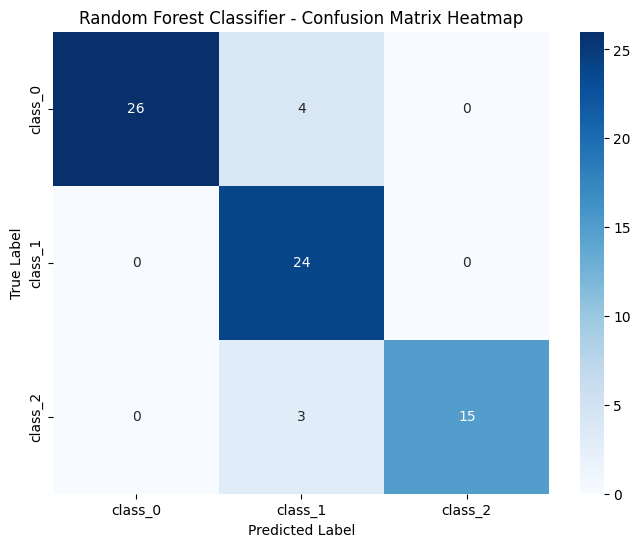

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for the Random Forest Classifier
rf_conf_matrix = confusion_matrix(y_test, bag_y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, cmap="Blues", fmt="d",
            xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title("Random Forest Classifier - Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Each method has strengths depending on the problem, size of data, and interpretability.

*   **Hard Voting** works well when combining different types of models.
*   **Bagging** excels when using high-variance models like Decision Trees.
*   **Random Forests** provide the best balance of accuracy, feature insight, and variance reduction.

